In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras.applications.resnet import ResNet50, ResNet101, ResNet152
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
data_dir = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir'

num_classes = 10
channels = 3
img_size = 224

resnet50_pooling = 'avg'
resnet50_weight = 'imagenet'
dense_layer_activation = 'softmax'
objective_function = 'categorical_crossentropy'
loss_metrics = ['accuracy']

learning_rate = 0.001
beta_1=0.9
beta_2=0.999

num_epochs = 10
early_stop_patience = 3
steps_per_epochs_training = 10
steps_per_epochs_validation = 10

batch_size_training = 32
batch_size_validation = 32
batch_size_testing = 1

In [4]:
model = Sequential()
model.add(ResNet50(include_top = False, pooling = resnet50_pooling, weights = resnet50_weight, input_shape=(img_size, img_size, channels)))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation = dense_layer_activation))

model.layers[0].trainable = False

94773248/94765736 [==============================] - 1s 0us/step


In [0]:
adam = tf.keras.optimizers.Adam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2)
model.compile(optimizer = adam, loss = objective_function, metrics = loss_metrics)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

In [0]:
from platform import python_version_tuple

if python_version_tuple()[0] == '3':
    xrange = range
    izip = zip
    imap = map
else:
    from itertools import izip, imap

import numpy as np

In [0]:
def my_preprocessing_func(img):
    image = np.array(img)
    return image / 255

datagen = ImageDataGenerator(rescale=None,validation_split=0.3, rotation_range=30, width_shift_range=0.2, 
       height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, 
       preprocessing_function=preprocess_input)

In [9]:
train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size_training,
        shuffle = True,
        class_mode='categorical',
        subset='training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size_validation,
    shuffle = True,
    class_mode='categorical',
    subset='validation')

Found 3500 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.


In [10]:
fit_history = model.fit(
        train_generator,
        #x_train, y_train,
        steps_per_epoch=steps_per_epochs_training,
        validation_steps=steps_per_epochs_validation,
        epochs = num_epochs,
        validation_data =validation_generator
)

Epoch 1/20
10/10 [==============================] - 346s 35s/step - loss: 1.9874 - accuracy: 0.3375 - val_loss: 2.1940 - val_accuracy: 0.3375
Epoch 2/20
10/10 [==============================] - 338s 34s/step - loss: 0.9349 - accuracy: 0.7125 - val_loss: 1.6691 - val_accuracy: 0.5031
Epoch 3/20
10/10 [==============================] - 338s 34s/step - loss: 0.6341 - accuracy: 0.8281 - val_loss: 1.3172 - val_accuracy: 0.6125
Epoch 4/20
10/10 [==============================] - 340s 34s/step - loss: 0.5136 - accuracy: 0.8406 - val_loss: 1.0271 - val_accuracy: 0.7437
Epoch 5/20
10/10 [==============================] - 208s 21s/step - loss: 0.4633 - accuracy: 0.8687 - val_loss: 0.8059 - val_accuracy: 0.8133
Epoch 6/20
10/10 [==============================] - 159s 16s/step - loss: 0.3184 - accuracy: 0.9375 - val_loss: 0.5925 - val_accuracy: 0.9000
Epoch 7/20
10/10 [==============================] - 160s 16s/step - loss: 0.3678 - accuracy: 0.8938 - val_loss: 0.5564 - val_accuracy: 0.9000
Epoch 

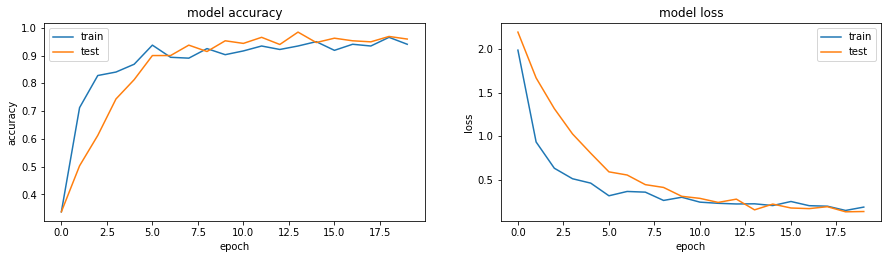

In [11]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test']) 

plt.show()

In [12]:
model.evaluate_generator(validation_generator, 1500/32)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.14669150114059448, 0.9453125]

In [14]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label sebenarnya')
    plt.xlabel('Label yang diprediksi')

Y_pred = model.predict_generator(validation_generator, 1500/32+1)
y_pred = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(confusion_mtx, classes = range(10))

print('Report : ')
print(classification_report(validation_generator.classes, y_pred))

ValueError: ignored